In [5]:
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
import matplotlib.pyplot as plt



data = pd.read_csv('donut.csv').values
x = data[:,:2]
y = data[:,2]


Visualize dataset 

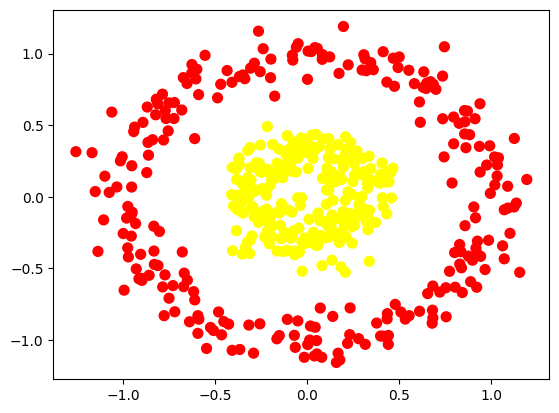

In [6]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plt.show()

Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


Apply KNN

In [8]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

Show metrics

In [9]:
y_test_pred = knn.predict(X_test)
print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing precision = {}'.format(metrics.precision_score(y_test, y_test_pred)))
print('Testing recall = {}'.format(metrics.recall_score(y_test, y_test_pred)))



Testing accuracy = 1.0
Testing precision = 1.0
Testing recall = 1.0


### Lasso, Ridge and Bayes

In [10]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/8, random_state=123)

In [13]:
lasso = Lasso()
ridge = Ridge()
lasso.fit(x_train, y_train)
ridge.fit(x_train, y_train)

print("Lasso Coefficient", lasso.coef_)
print("Ridge Coefficient", ridge.coef_)

Lasso Coefficient [-6.29657633e-02  3.50956640e-02  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  2.26979134e+00  6.77955847e-04 -6.45065773e-01
  1.93545727e-01 -1.35087027e-02 -6.45345873e-01  4.49042185e-03
 -6.73150676e-01]
Ridge Coefficient [-1.11057981e-01  3.65852805e-02  4.69212854e-02  6.03824135e-01
 -6.97460565e+00  5.11864285e+00 -2.69870227e-02 -1.22824280e+00
  2.49139807e-01 -1.39899765e-02 -8.47813312e-01  6.95422088e-03
 -4.68816487e-01]


Task: Let's try different values for alpha for Lasso regressor and plot the validation loss.

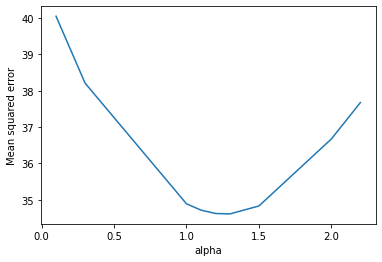

Best value of alpha: 1.3


In [14]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.metrics import mean_squared_error
%matplotlib inline

alphas = [2.2, 2, 1.5, 1.3, 1.2, 1.1, 1, 0.3, 0.1]
losses = []
for alpha in alphas:
    # Write (5 lines): create a Lasso regressor with the alpha value.
    # Fit it to the training set, then get the prediction of the validation set (x_val).
    # calculate the mean sqaured error loss, then append it to the losses array
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_val)
    mse = mean_squared_error(y_val, y_pred)
    losses.append(mse)
plt.plot(alphas, losses)
plt.xlabel("alpha")
plt.ylabel("Mean squared error")
plt.show()

best_alpha = alphas[np.argmin(losses)]
print("Best value of alpha:", best_alpha)

Measuring the loss on the testset with Lasso regressor with the best alpha.

In [53]:
lasso = Lasso(best_alpha)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
print("MSE on testset:", mean_squared_error(y_test, y_pred))

MSE on testset: 5.068003756957042


## Loading the digit dataset
Dataset of 10 classes/ 0123456789

In [18]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gauss_nb = GaussianNB()
gauss_nb.fit(x_train, y_train)
y_pred = gauss_nb.predict(x_test)
print(accuracy_score(y_test, y_pred))


0.8777777777777778


## Good case for looking at confusion matrix. Copy and make confusion matrix for y_pred

In [17]:
from sklearn.metrics import confusion_matrix


conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_mat, '\n')



Confusion Matrix:
 [[34  0  0  0  0  0  0  1  0  0]
 [ 0 34  0  0  0  0  2  0  2  1]
 [ 0  4 19  0  0  0  0  0  6  0]
 [ 0  0  0 28  0  2  0  1  4  2]
 [ 0  0  0  0 27  1  0  6  0  0]
 [ 0  0  0  0  0 38  0  1  0  0]
 [ 0  0  0  0  0  0 33  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  3  0  0  0  0  0  2 37  1]
 [ 2  1  0  1  1  0  1  4  3 28]] 



## Cross Validation
Cross validation comes as an alternative for the validation set splitting.

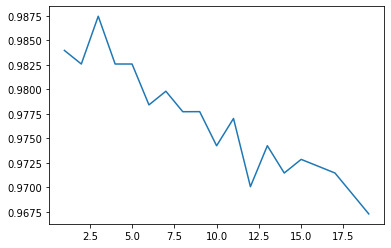

[0.9839822739420182, 0.9825953113900071, 0.9874699773350022, 0.9825953113900071, 0.9825953113900071, 0.9784242752274956, 0.9798180034504922, 0.9777274111159974, 0.9777341767869828, 0.9742532390649842, 0.9770373126754845, 0.9700788200669802, 0.974256621900477, 0.9714725482899766, 0.9728628936774805, 0.9721694124014749, 0.9714725482899766, 0.9693887216264673, 0.9672981292919725]
3


In [49]:
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

Ks = list(range(1, 20))
cv_scores = []
for K in Ks:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, x_train, y_train,
                             cv=7, scoring='accuracy')
    avg_score = np.mean(scores)
    cv_scores.append(avg_score)

plt.plot(Ks, cv_scores)
plt.show()
print(cv_scores)
print(Ks[np.argmax(cv_scores)])

In KNN classifier, there're several hyperparamters to tune, tuning them one by one is exhaustive approach.
Let's try a better approach called GridSearchCV.


### GridSearchCV
In GridSearch Cross-validation, you give different values for each hyperparamter and it will try all combinations for you.
At the end, it will return the best combination of hyperparamters that got the best cross-validation score.

Task:
Use gridsearch to tune 3 hyperparameters:

1. $n\_neighbors$: [1, 2, . . ., 10]
2. $weights$: ['uniform', 'distance']
3. $metric$: ['euclidean', 'manhattan', 'chebyshev', 'cosine']

Check this [link](https://scikit-learn.org/stable/modules/grid_search.html) for help.

Then measure the accuracy on the testset.

In [21]:
from sklearn.model_selection import GridSearchCV

# Modify the next lines to run GridSearchCV with cv=7
param_grid = {'n_neighbors':list(range(1, 11)),
              'weights':['uniform', 'distance'],
              'metric':['euclidean', 'manhattan', 'chebyshev', 'cosine']
              }

grid_search_clf = GridSearchCV(estimator=KNeighborsClassifier(),
                               
                               param_grid=param_grid
                               )

grid_search_clf.fit(x_train, y_train)
means = grid_search_clf.cv_results_['mean_test_score']
stds = grid_search_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()
print("Best parameters set found on development set:")
print()
print(grid_search_clf.best_params_)

y_pred = grid_search_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))


0.983 (+/-0.007) for {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.983 (+/-0.007) for {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.981 (+/-0.013) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.983 (+/-0.007) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.981 (+/-0.017) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.982 (+/-0.018) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.980 (+/-0.021) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.983 (+/-0.014) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.978 (+/-0.026) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.978 (+/-0.026) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.976 (+/-0.021) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.981 (+/-0.023) for {'metric': 'euclidean', 'n_neighbors': 